# 9. Машинско учење без надзор - Кластерирање

Во оваа глава ќе научите за машинското учење без надзор (анг. unsupervised machine learning), уште и наречено учење без учител. Тоа е метод за учење од податоци кои не се означени, односно за кои се познати само обележјата но не и вредностите или класите (сл. 1). Генералната замисла е дека алгоритмот и без тоа ќе успее да ги класифицира податоците носејќи заклучоци според некои длабоки и за нас скриени зависности. 

<figure>
<img src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/09/unsup1.png" style="height: 300px;"/> 
<figcaption align = "center"> Слика 1. Разлика помеѓу учење со надзор и учење без надзор.</figcaption>
</figure>

Кластерирањето е форма на учење без надзор каде што алгоритмот има задача да групира множество на објекти во групи наречени **кластери** така што објектите во еден ист кластер повеќе личат еден на друг отколку што личат на оние во другите кластери.

Постојат неколку различни алгоритми за кластерирање, како што се:

* KMeans;
* DBSCAN;
* Агломеративно хиерархиско кластерирање;
* Кластерирање со максимизирање на очекувањето (ЕМ);
* Кластерирање со поместување на средната вредност.

Многу често останува на корисникот да го наведе бројот на кластери, па тоа е најважниот хиперпараметар во кластерирањето. Различни алгоритми потоа користат различни методи за да ги групираат податоците во кластери (пр. растојание помеѓу податочните точки, густина на податочните точки итн.).  

## 9.1. KMeans кластерирање

### 9.1.1. Алгоритам

Ова е еден од најпопуларните и најшироко користени методи за кластерирање. Ги дели податоците во $k$ различни кластери врз основа на Евклидовото (геометриско) растојание помеѓу податочните точки.

Овој едноставен алгоритам работи на следниов начин:
1. Случајно ги генерира централните точки (наречени центриоиди) на $k$-те кластери.
2. Поминува низ сите податочни точки и проверува кој центроид е најблиску; ја доделува податочната точка на тој кластер.
3. Пресметува нова локација за секој од $k$-те центроиди како средна вредност на локациите на сите податочни точки доделени на тој кластер.
4. Пресметува вредност на функцијата на цена за даденото кластерирање.
5. Ако разликата помеѓу вредностите на функцијата на цена во тековната и претходната итерација е поголема од одредена толеранција 𝜖, тогаш се враќа на чекор 2. Во спротивно, резултатот е последното кластерирање.  
ИЛИ  
Ако не е постигнат максималниот број на повторувања, тогаш се враќа на чекор 2. Во спротивно, резултатот е последното кластерирање.  

Последниот чекор се разликува во зависност од тоа дали условот за запирање на алгоритмот е да се достигне одреден број максимални повторувања или пак е вредноста на функцијата на трошоците да се конвергира (т.е. да престане значително да се менува помеѓу повторувањата). Прагот 𝜖 под кој промената се смета за незначителна е исто така хиперпараметар дефиниран од корисникот.  

Алгоритмот е визуелно претставен на сл.2, каде што е прикажана прераспределбата на точките на податоци во 3 кластери во текот на 14 повторувања.  

<figure>
<img src="https://raw.githubusercontent.com/VALENCEML/eBOOK/main/EN/09/K-means_convergence.gif" style="height: 300px;"/>
<figcaption align = "center"> Слика 2. Визуелна претстава на k-means алгоритмот (Chire, CC BY-SA 4.0 <https://creativecommons.org/licenses/by-sa/4.0>, via Wikimedia Commons) </figcaption>
</figure>

### 9.1.2. Функција на цена  

Функцијата на цена во KMeans се нарекува и **изобличување (анг. distortion)**, и таа го претставува збирот на растојанијата помеѓу секоја точка и нејзиниот локален центроид.  

Ако _m_ е бројот на податочни точки, _x<sup>(i)</sup>_ се точките на податоци, _$\mu$<sub>(i)</sub>_ е центроидот на кластерот на која точката _x<sup>(i)</sup>_ е доделена, а $||A-B||^2$ е растојанието помеѓу две точки A и B, тогаш изобличувањето _J_ се пресметува како:  

$J=\frac{1}{m}\sum_{i=1}^m ||x^{(i)}-\mu_{(i)}||^2$

Преку чекорите 2 и 3 дадени погоре, алгоритмот всушност се обидува да ја оптимизира оваа функција _J_, односно се обидува да ја најде најдобрата можна дистрибуција на податоците во кластери што ќе резултира со најмала можна вредност за _J_.  

Оваа функција на трошоците не е конвексна, што значи дека ако двапати го извршите алгоритмот KMeans на истите податоци, можеби нема да го добиете истиот резултат. Конечниот резултат зависи од почетните локации на центроидите, кои се избрани по случаен избор. Затоа е многу важно да го пробате алгоритмот повеќе пати за да му дадете шанса правилно да се изврши и потоа да го изберете најдобриот резултат.  

Другата опција е да се користи посебен начин за избирање на почетните локации на центроидите наречени k-means++. Ова нема да биде објаснето овде, но се користи при повикување на функцијата KMeans во sklearn.  

### 9.1.3. Едноставни примери  

Ќе креираме неколку едноставни податочни множества како примери, и ќе го тестираме алгоритмот KMeans на нив.  

In [1]:
# Import the necessary libraries and modules:
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

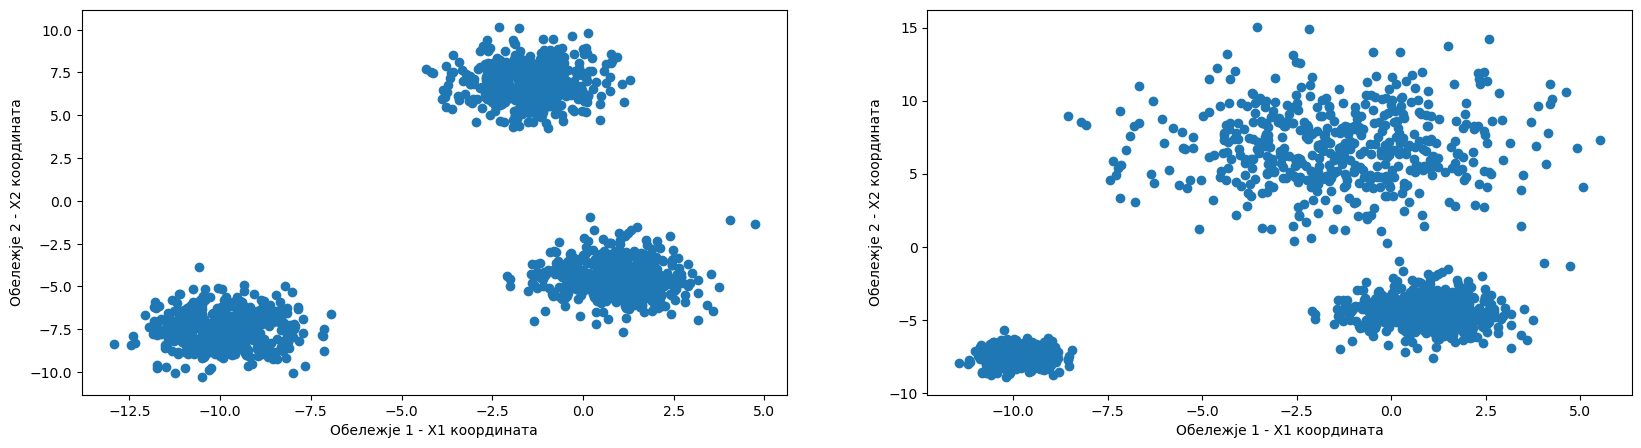

In [2]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate blobs with similar variances (shapes):
blobs = datasets.make_blobs(n_samples=n_samples,random_state=random_state)
# Generate blobs with different variances (shapes):
varied = datasets.make_blobs(n_samples=n_samples,cluster_std=[1.0, 2.5, 0.5],random_state=random_state)

# Plot the generated datasets:
datsets = {'blobs': blobs,'varied': varied}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets:
    X, y = datsets[key]
    plt.subplot(1, len(datsets), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Обележје 1 - X1 координата')
    plt.ylabel('Обележје 2 - X2 координата')
    plot_nr += 1

Се чини очигледно дека во двата случаи треба да има 3 кластери, па да одиме со тој број.  

Првин, ќе пробаме да ги одвоиме еднаквите групи на податоци (лева слика) во кластери. Го правиме следното:  
* Ги сместуваме дводимензионалните координати на секоја податочна точка во X и кластерот во кој припаѓаат во y. ВАЖНО: Алгоритмот не ги знае однапред кластерите на податочните точки, па оттука и ненадгледуваното учење.  
* Ги стандардизираме карактеристиките со функцијата StandardScaler, што значи дека сите податоци сега имаат средна вредност нула и варијанса еден. Ова е важен чекор во кластерирањето за да се избегнат какви било проблеми што се јавуваат поради обликот и дистрибуцијата на податоците.  
* Го повикуваме/иницијализираме алгоритмот KMeans. Ги доделуваме следните аргументи:  
   * _n__clusters_ е бројот на кластери.  
   * _init_ е начинот на кој ги иницијализираме центроидите. Можеме да го направиме тоа по случаен избор, како што е дадено во овој пример, или можеме да користиме k-means++ кој ги избира почетните центроиди на кластерите користејќи сложени пресметки кои нема да ги разгледуваме тука.  
   * _n__init_ кажува колку пати  алгоритмот ќе се обиде случајно да ги регенерира почетните центроиди пред да го избере најдобриот случај.  
   * _max__iter_ е максималниот бројот на повторувања пред да престане алгоритмот.  
* Алгоритмот го извршуваме со kmeans.fit_predict и fit_transform (забележете како алгоритмот го "храниме" само со вредностите на X).  
* Ги исцртуваме резултатите, каде секој кластер е во различна боја.  

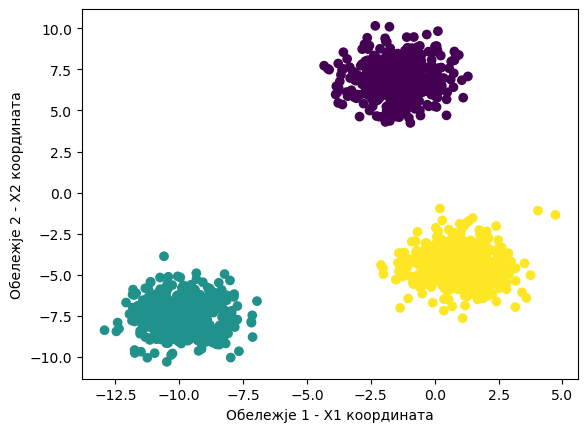

In [3]:
X, y = datsets['blobs'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=5,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
#plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Обележје 1 - X1 координата')
plt.ylabel('Обележје 2 - X2 координата');

Забележете како податоците се поделени во 3-те кластери прилично логично според нашите стандарди. Но, прашањето што ќе го разгледаме подоцна е како да го одредиме бројот на кластери во општ случај, кога не можеме да го визуелизираме проблемот.

Следно, да провериме што се случува кога ќе се обидеме да ги одвоиме разновидните податоци (десната слика погоре) во 3 кластери. Ги користиме истите аргументи како и досега, со тој исклучок што овој пат бројот на случајни иницијализирања го ставаме да биде 1. Тоа значи дека алгоритмот ќе се обиде да ги одвои податоците по само 1 обид за случајна иницијализација на центроидите. Извршете го следниот код неколку пати и забележете како кластерирањето не е конзистентно бидејќи зависи од почетните услови.  

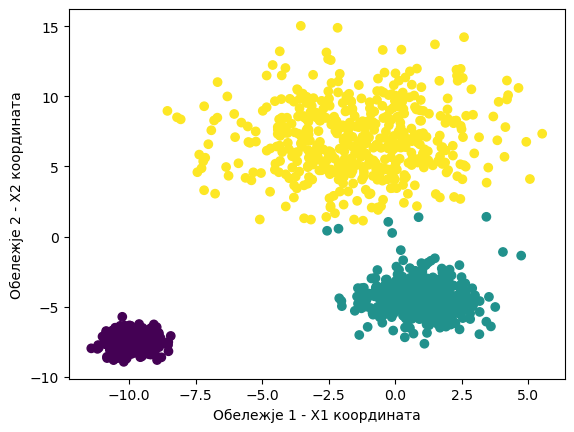

In [4]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data
kmeans = KMeans(n_clusters=3,init='random',n_init=1,max_iter=20) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Обележје 1 - X1 координата')
plt.ylabel('Обележје 2 - X2 координата');

Ова може лесно да се поправи на неколку различни начини:  
* бројот на иницијализација може да биде поголем од 1 (како во претходниот пример),  
* бројот на повторувања може да биде поголем (иако ова не секогаш гарантира конвергенција),  
* може да се користи различна техника за иницијализација наместо случајна, како на пример k-means++.  

Обидете се повторно со примерот, но овој пат со менување на вредностите на овие три аргументи и набљудување на резултатите.  

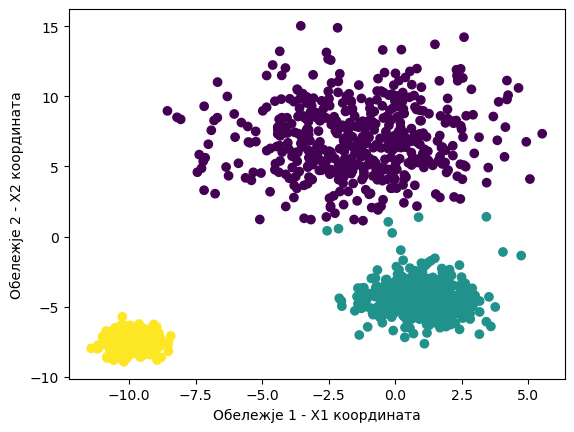

In [5]:
X, y = datsets['varied'] # retrieve data
scaler = StandardScaler() # standardize data

# Try both methods by inserting 0 for 'random' or 1 for 'k-means++' 
# in the 'init' list when calling KMeans: 
init=['random','k-means++'] 
# Try different numbers of initializations:
n_init=1 
# Try different (larger) numbers of maximum iterations:
max_iter=200 

kmeans = KMeans(n_clusters=3,init=init[0],n_init=n_init,max_iter=max_iter) # initialize algorithm
y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
# plot:
plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
plt.xlabel('Обележје 1 - X1 координата')
plt.ylabel('Обележје 2 - X2 координата');

Забележете дека за една случајна иницијализација, понекогаш кластерите може да не конвергираат правилно без оглед на бројот на повторувања.  

### 9.1.4. Одредување на бројот на кластери  

Ако проблемот не е едноставен за визуелизирање, не можеме секогаш лесно да го одредиме бројот на кластери. Добар метод за одредување на најдобриот број на кластери во таков случај е да се користи таканаречениот **"метод на лакт (анг. elbow method)"**.  

Идејата е да се пресмета вредноста на изобличувањето на крајот од кластерирањето за различен број на кластери. Запомнете дека оваа вредност е претстава за „лошиот квалитет“ или грешката при кластерирањето и затоа треба да биде што е можно пониска.  

Доколку дојде до ненадеен пад на оваа изобличеност при одреден број на класери, по што намалувањето е побавно и линеарно, тогаш токму тоа е бројот на кластери што се избираат. Причината е што бројот на кластери создава преголемо изобличување за помалку кластери, а повеќе кластери не вредат бидејќи изобличувањето повеќе не се намалува многу.  

Ќа го покажеме ова на претходно видените примери.  

C:\Users\gorja\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  "KMeans is known to have a memory leak on Windows "
C:\Users\gorja\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  "KMeans is known to have a memory leak on Windows "


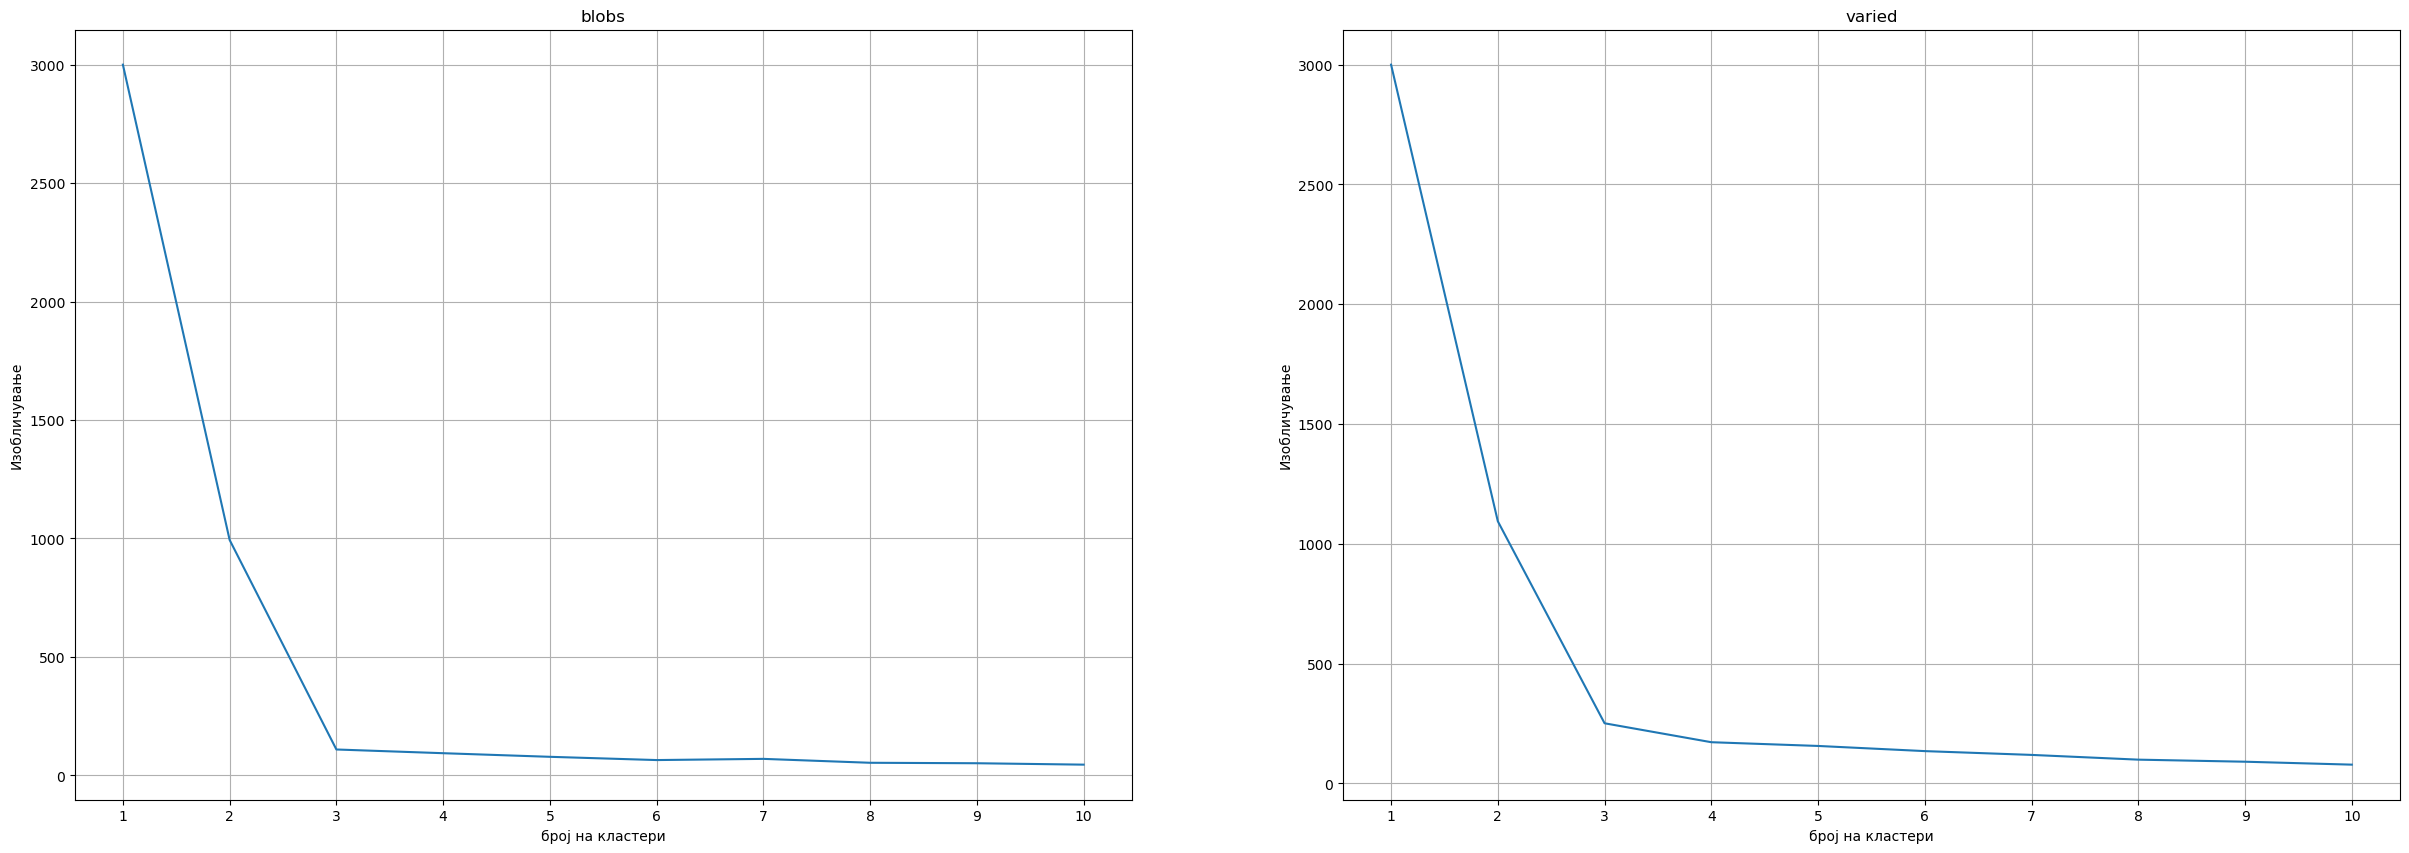

In [6]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots
max_nr_clusters = 10 # maximum number of clusters

for key in datsets: # for each dataset:
    X, y = datsets[key] # retrieve data
    cost_func = [] # define an empty list to store the values of the distortion
    for nr_clusters in range(1, max_nr_clusters + 1): # for an increasing number of clusters, starting from one:
        scaler = StandardScaler() # standardize data
        kmeans = KMeans(n_clusters=nr_clusters,init='random',n_init=5) # initialize algorithm
        kmeans.fit(scaler.fit_transform(X)) # run algorithm
        cost_func.append(kmeans.inertia_) # calculate inertia (interchangable with distortion)
    # Plot the dependence of the distortion from the number of clusters:
    plt.subplot(1, len(datsets), plot_nr) 
    plt.plot(range(1, 11), cost_func)
    plt.xlabel('број на кластери')
    plt.ylabel('Изобличување')
    plt.title(key)
    plt.xticks(range(1, 11))
    plt.grid()
    plot_nr += 1 

Очигледно е дека "лактот" (точката на прекршување) во двата случаи се појавува за 3 кластери. Затоа нашиот избор на почетокот, инспириран од изгледот на податоците, беше точен.  

Се разбира, овој метод служи само за давање на препорака за бројот на кластери. Секоја дополнителна информација за проблемот може да помогне во одредувањето на бројот на кластери дури и повеќе од методот на лактот.  

### 9.1.5. Ограничувањата на KMeans  

KMeans е добар метод бидејќи е лесен за имплементација и може да се користи со големи множества на податоци. Сепак, еден од неговите главни недостатоци (покрај веќе видениот факт дека е чувствителен на почетните локации на центроидите на кластерите) е тоа што функционира слабо кога податоците имаат некои неправилни (не-сферични) форми.  

Таков пример може да се види од следните множества на податоци, обликувани како концентрични кругови и како полумесечини.  

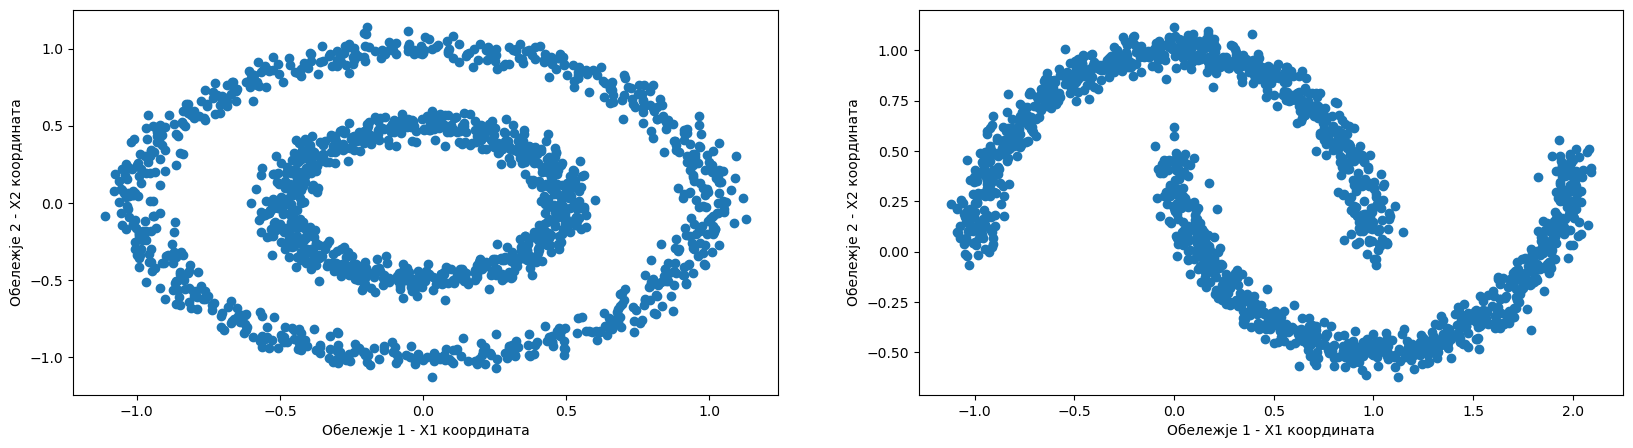

In [7]:
n_samples = 1500 # number of data points
random_state = 100 # seed number for data points generation 
# Generate concentrical circles:
noisy_circles = datasets.make_circles(n_samples=n_samples,factor=.5,noise=.05)
# Generate crescents:
noisy_moons = datasets.make_moons(n_samples=n_samples,noise=.05) 

# Plot the generated datasets:
datsets2 = {'circles': noisy_circles,'crescents': noisy_moons}
plot_nr = 1
plt.figure(figsize=(20, 5))
for key in datsets2:
    X, y = datsets2[key]
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1])
    plt.xlabel('Обележје 1 - X1 координата')
    plt.ylabel('Обележје 2 - X2 координата')
    plot_nr += 1

Да се обидеме да ги поделиме податоците во 2 кластери, очекувајќи тие да го содржат секој од двата кругови во првиот пример и секоја од двете полумесечини во вториот пример.  

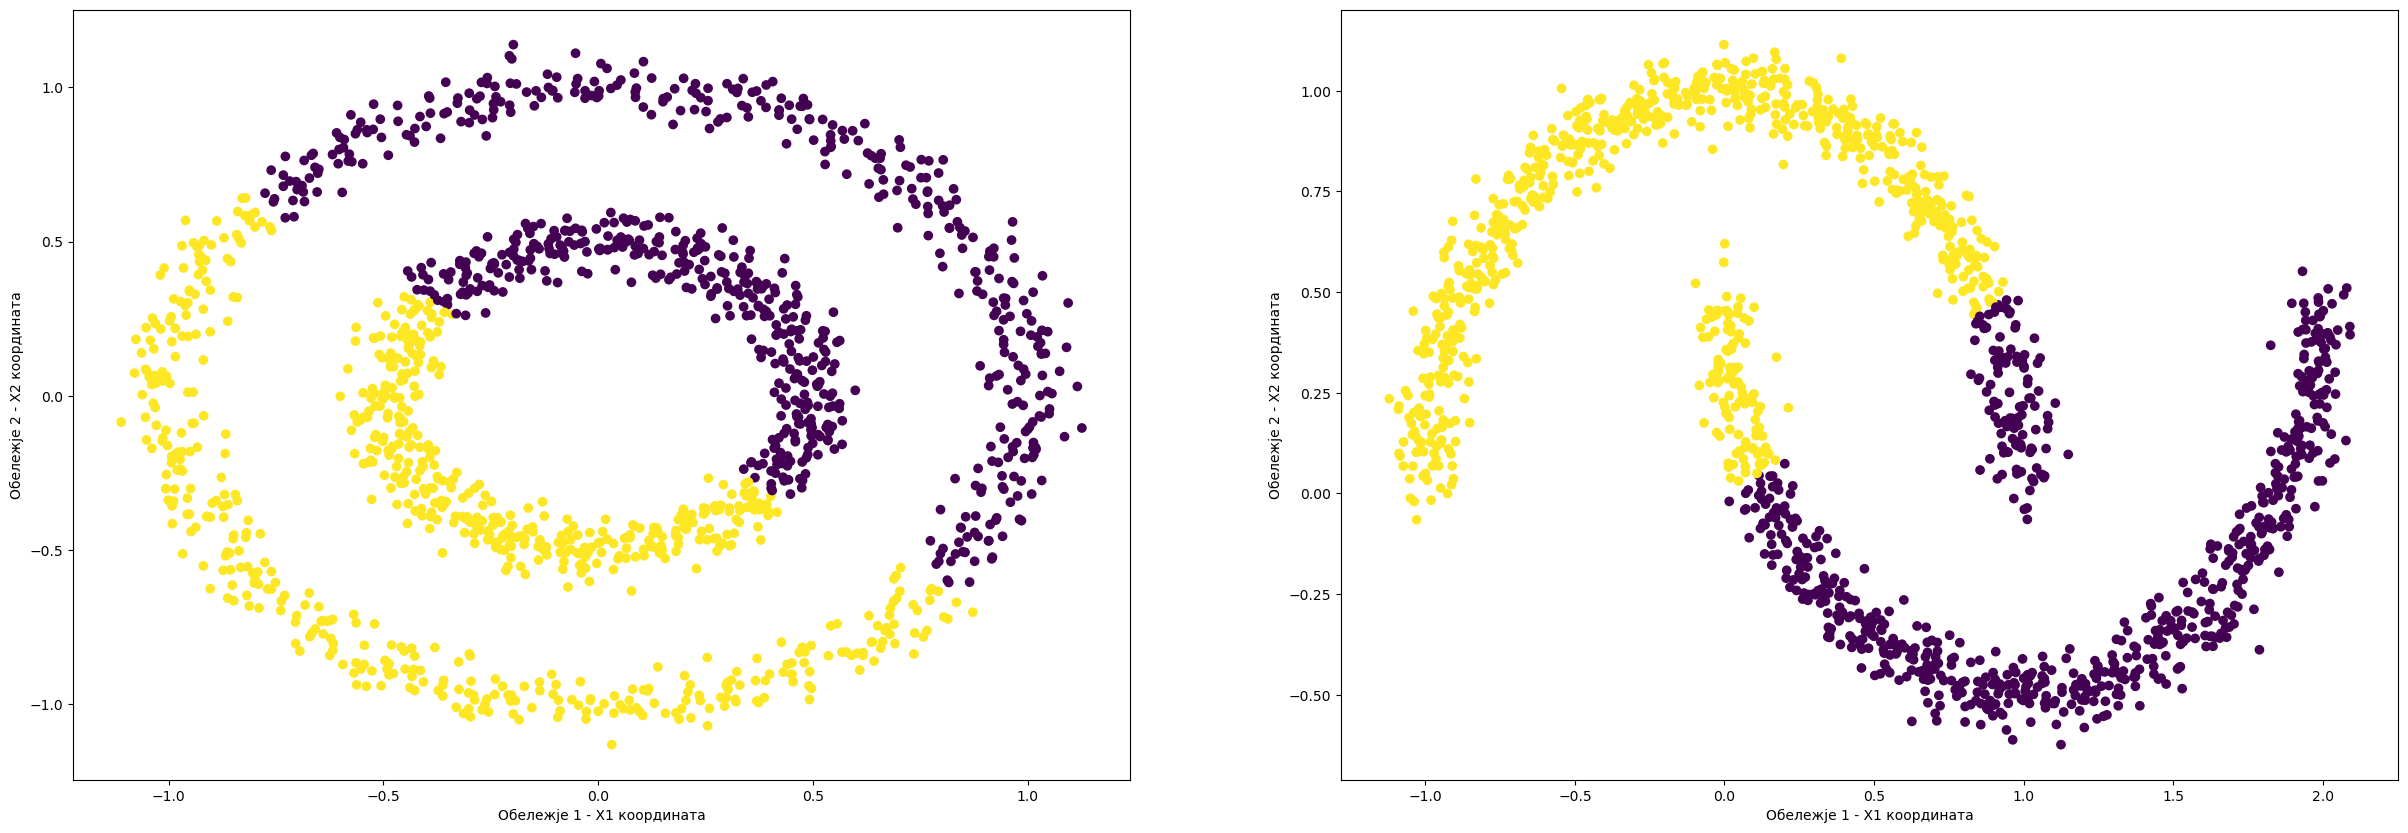

In [8]:
plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    kmeans = KMeans(n_clusters=2,init='random',n_init=5,max_iter=200) # initialize algorithm
    y_pred = kmeans.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Обележје 1 - X1 координата')
    plt.ylabel('Обележје 2 - X2 координата')
    plot_nr += 1

Гледаме дека KMeans не успеа да го постигне тоа. Во вакви случаи, се препорачуваат други пристапи. На пример, **DBSCAN (анг. Density-based spatial clustering of applications with noise - просторно групирање засновано на густина, на апликации со шум)** ја користи густината на податочните точки наместо нивните растојанија, така што ќе даде подобри резултати во овој пример.  

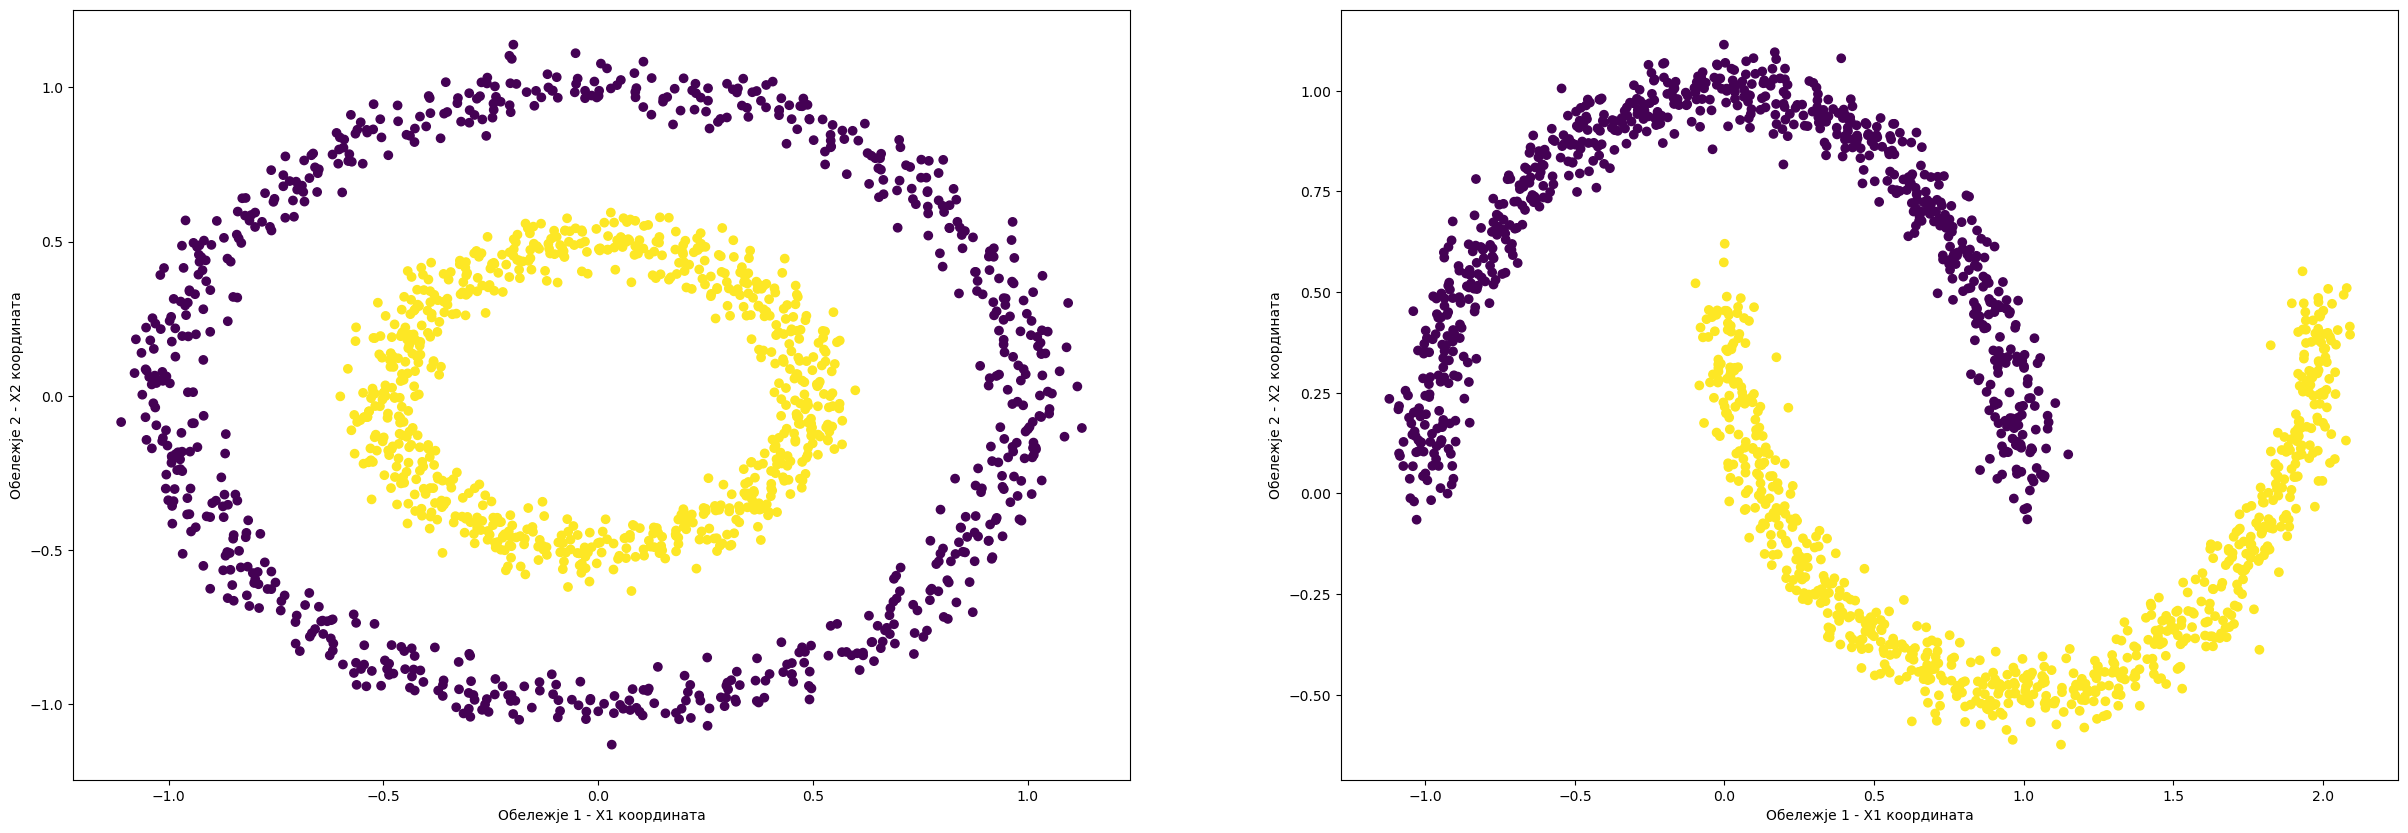

In [9]:
from sklearn.cluster import DBSCAN 

plt.figure(figsize=(30, 10)) # generate an empty figure
plot_nr = 1 # start a counter for the number of plots

for key in datsets2: # for each dataset:
    X, y = datsets2[key] # retrieve data
    scaler = StandardScaler() # standardize data
    dbscan = DBSCAN(eps=0.3,min_samples=10) # initialize algorithm
    y_pred = dbscan.fit_predict(scaler.fit_transform(X)) # run algorithm
    # plot:
    plt.subplot(1, len(datsets2), plot_nr)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred) 
    plt.xlabel('Обележје 1 - X1 координата')
    plt.ylabel('Обележје 2 - X2 координата')
    plot_nr += 1

DBSCAN успешно ги препозна двете форми, бидејќи го интересира густината како претстава на групирањето на податоците, наместо нивната оддалеченост (што е очигледно ако се споредат со резултатите од KMeans на истите податоци). Од друга страна, DBSCAN нема да работи добро ако облиците имаат различна густина.  

Двата хиперпараметра што ги дефиниравме за DBSCAN се:  
* _eps_ е максималното растојание помеѓу два примероци за да се смета дека се во истото соседство.  
* _min__samples_ е потребниот број на примероци во соседството на една точка за таа да се смета како основна точка.  

Овие хиперпараметри се многу потешки за прилагодување од оние на KMeans затоа што се поапстрактни, па иако е помоќен од KMeans, ова е поделикатен и потежок алгоритам за правилна имплементација.  

## 9.2. Пример за користење на KMeans за кластерирање на метеоролошки станици според податоци за нивните климатски карактеристики

Овој пример ќе користи база на податоци од метеоролошки станици во Канада, чии обележја се мерењата на секоја станица. Ќе го направиме кластерирањето според типовите на климата, а потоа ќе ги визуелизираме станиците географски за да го оцениме нашиот пристап.  

Ќе ви бидат потребни следните библиотеки:  
1. wget -> (conda install -c conda-forge python-wget) за спуштање на фајлови  
2. cartopy -> (conda install -c conda-forge cartopy) за цртање на мапа  
3. PIL -> (conda install -c anaconda pillow)  

Информации за податочното множество  
<h4 align = "center">
Environment Canada    
Monthly Values for July - 2015	
</h4>
<html>
<head>
<style>
table {
    font-family: arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
}

td, th {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
}

tr:nth-child(even) {
    background-color: #dddddd;
}
</style>
</head>
<body>

<table>
  <tr>
    <th>Име</th>
    <th>Значење</th>
  </tr>
  <tr>
    <td><font color = "green"><strong>Stn_Name</font></td>
    <td><font color = "green"><strong>Име на станицата</font</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Lat</font></td>
    <td><font color = "green"><strong>Географска ширина (North+, degrees)</font></td>
  </tr>
  <tr>
    <td><font color = "green"><strong>Long</font></td>
    <td><font color = "green"><strong>Географска должина(West - , degrees)</font></td>
  </tr>
  <tr>
    <td>Prov</td>
    <td>Провинција</td>
  </tr>
  <tr>
    <td>Tm</td>
    <td>Средна температура (°C)</td>
  </tr>
  <tr>
    <td>DwTm</td>
    <td>Денови без валидна средна температура</td>
  </tr>
  <tr>
    <td>D</td>
    <td>Разлика на средната температура од нормалната за 1981-2010 (°C)</td>
  </tr>
  <tr>
    <td><font color = "black">Tx</font></td>
    <td><font color = "black">Највисока месечна температура (°C)</font></td>
  </tr>
  <tr>
    <td>DwTx</td>
    <td>Денови без валидна највисока месечна температура</td>
  </tr>
  <tr>
    <td><font color = "black">Tn</font></td>
    <td><font color = "black">Најниска месечна температура (°C)</font></td>
  </tr>
  <tr>
    <td>DwTn</td>
    <td>Денови без најниска месечна температура</td>
  </tr>
  <tr>
    <td>S</td>
    <td>Паднат снег (cm)</td>
  </tr>
  <tr>
    <td>DwS</td>
    <td>Денови без валиден паднат снег</td>
  </tr>
  <tr>
    <td>S%N</td>
    <td>Процент на нормален (1981-2010) паднат снег</td>
  </tr>
  <tr>
    <td><font color = "green"><strong>P</font></td>
    <td><font color = "green"><strong>Вкупно врнежи (mm)</font></td>
  </tr>
  <tr>
    <td>DwP</td>
    <td>Денови без валидни вкупни врнежи</td>
  </tr>
  <tr>
    <td>P%N</td>
    <td>Процент на нормални (1981-2010) вкупни врнежи</td>
  </tr>
  <tr>
    <td>S_G</td>
    <td>Снег на земјата на крајот од месецот (cm)</td>
  </tr>
  <tr>
    <td>Pd</td>
    <td>Број на денови без врнежи над 1.0 mm</td>
  </tr>
  <tr>
    <td>BS</td>
    <td>Сончева светлина (hours)</td>
  </tr>
  <tr>
    <td>DwBS</td>
    <td>Денови без валидна сончева светлина</td>
  </tr>
  <tr>
    <td>BS%</td>
    <td>Процент на нормална (1981-2010) сончева светлина</td>
  </tr>
  <tr>
    <td>HDD</td>
    <td>Денови со температура под 18 °C</td>
  </tr>
  <tr>
    <td>CDD</td>
    <td>Денови со температура над 18 °C</td>
  </tr>
  <tr>
    <td>Stn_No</td>
    <td>Идентификатор на станица</td>
  </tr>
  <tr>
    <td>NA</td>
    <td>Not Available</td>
  </tr>


</table>

</body>
</html>
    
    
Ги вчитуваме потребните библиотеки и ја симнуваме податочната датотека:  

In [2]:
import wget
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy

In [3]:
wget.download('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/weather-stations20140101-20141231.csv')

'weather-stations20140101-20141231.csv'

In [4]:
data = pd.read_csv('weather-stations20140101-20141231.csv')

In [5]:
data.head()

,Stn_Name,Lat,Long,Prov,Tm,DwTm,D,Tx,DwTx,Tn,...,DwP,P%N,S_G,Pd,BS,DwBS,BS%,HDD,CDD,Stn_No
0,CHEMAINUS,48.935,-123.742,BC,8.2,0.0,NaN,13.5,0.0,1.0,...,0.0,NaN,0.0,12.0,NaN,NaN,NaN,273.3,0.0,1011500
1,COWICHAN LAKE FORESTRY,48.824,-124.133,BC,7.0,0.0,3.0,15.0,0.0,-3.0,...,0.0,104.0,0.0,12.0,NaN,NaN,NaN,307.0,0.0,1012040
2,LAKE COWICHAN,48.829,-124.052,BC,6.8,13.0,2.8,16.0,9.0,-2.5,...,9.0,NaN,NaN,11.0,NaN,NaN,NaN,168.1,0.0,1012055
3,DISCOVERY ISLAND,48.425,-123.226,BC,NaN,NaN,NaN,12.5,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1012475
4,DUNCAN KELVIN CREEK,48.735,-123.728,BC,7.7,2.0,3.4,14.5,2.0,-1.0,...,2.0,NaN,NaN,11.0,NaN,NaN,NaN,267.7,0.0,1012573


Ги отстрануваме празните податоци (NaN):  

In [6]:
data.drop(columns=['BS', 'DwBS', 'BS%', 'D', 'S', 'DwS', 'S%N', 'P%N', 'S_G'], inplace=True)
data.dropna(axis='rows', inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1143 entries, 0 to 1340
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Stn_Name  1143 non-null   object 
 1   Lat       1143 non-null   float64
 2   Long      1143 non-null   float64
 3   Prov      1143 non-null   object 
 4   Tm        1143 non-null   float64
 5   DwTm      1143 non-null   float64
 6   Tx        1143 non-null   float64
 7   DwTx      1143 non-null   float64
 8   Tn        1143 non-null   float64
 9   DwTn      1143 non-null   float64
 10  P         1143 non-null   float64
 11  DwP       1143 non-null   float64
 12  Pd        1143 non-null   float64
 13  HDD       1143 non-null   float64
 14  CDD       1143 non-null   float64
 15  Stn_No    1143 non-null   object 
dtypes: float64(13), object(3)
memory usage: 151.8+ KB


In [8]:
data.describe()

,Lat,Long,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.0
mean,50.950539,-97.471895,-11.535696,2.270341,3.082677,1.846019,-25.880490,1.834646,50.091426,2.524934,7.446194,757.104549,0.0
std,5.757043,23.136281,10.328233,4.964097,8.684320,4.208333,12.654909,4.314045,62.909236,4.666180,4.762158,309.067992,0.0
min,42.043000,-140.868000,-36.400000,0.000000,-28.900000,0.000000,-49.700000,0.000000,0.000000,0.000000,0.000000,26.000000,0.0
25%,46.942000,-117.165000,-17.800000,0.000000,-3.400000,0.000000,-35.000000,0.000000,13.000000,0.000000,4.000000,528.250000,0.0
50%,49.872000,-104.008000,-13.400000,0.000000,3.300000,0.000000,-29.000000,0.000000,26.400000,0.000000,7.000000,797.200000,0.0
75%,53.162500,-74.311000,-4.800000,2.000000,10.350000,1.000000,-21.000000,1.000000,59.650000,3.000000,11.000000,966.400000,0.0
max,82.500000,-52.753000,9.500000,27.000000,22.000000,27.000000,5.300000,27.000000,516.800000,27.000000,28.000000,1523.400000,0.0


In [9]:
coords = data[['Long', 'Lat']]

Ги отстрануваме сите нерелевантни колони (обележја):  

In [10]:
data.drop(columns=['Long', 'Lat', 'Stn_No', 'Stn_Name', 'Prov'], inplace=True)
data.head()

,Tm,DwTm,Tx,DwTx,Tn,DwTn,P,DwP,Pd,HDD,CDD
0,8.2,0.0,13.5,0.0,1.0,0.0,178.8,0.0,12.0,273.3,0.0
1,7.0,0.0,15.0,0.0,-3.0,0.0,258.6,0.0,12.0,307.0,0.0
2,6.8,13.0,16.0,9.0,-2.5,9.0,264.6,9.0,11.0,168.1,0.0
4,7.7,2.0,14.5,2.0,-1.0,2.0,168.4,2.0,11.0,267.7,0.0
5,8.8,0.0,13.1,0.0,1.9,0.0,81.0,8.0,12.0,258.6,0.0


Географска распределба на метеоролошките станици:  

C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_land.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_ocean.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/50m/physical/ne_50m_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)
C:\Users\gorja\Anaconda3\lib\site-packages\cartopy\io\__init__.py:260: DownloadWa

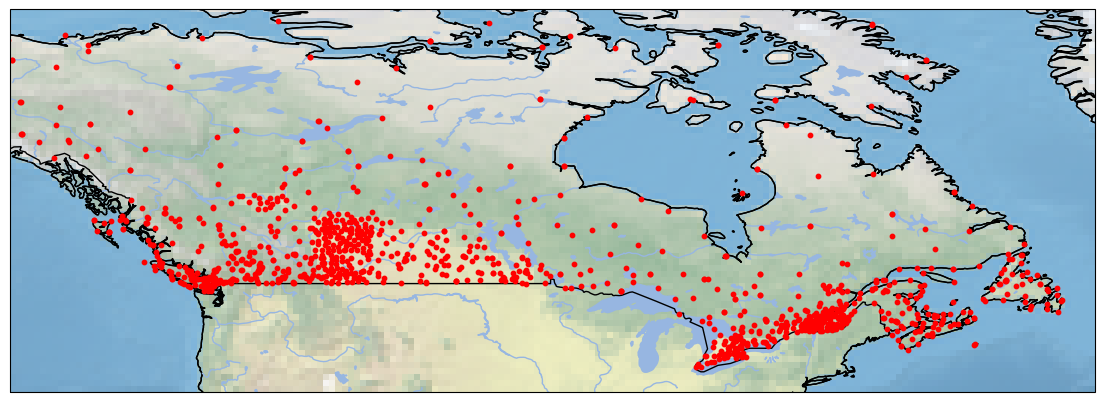

In [11]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), color='r', s=10)
plt.show()

KMeans кластерирање:  

C:\Users\gorja\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1037: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  "KMeans is known to have a memory leak on Windows "


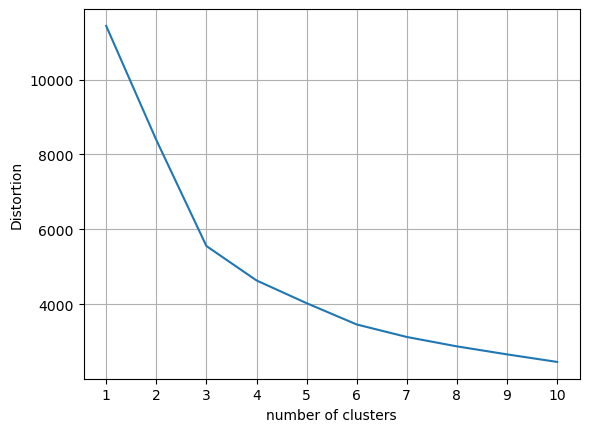

In [12]:
max_nr_clusters = 10
cost_func = []
for nr_clusters in range(1, max_nr_clusters + 1):
    scaler = StandardScaler()
    kmeans = KMeans(n_clusters=nr_clusters, init='k-means++', n_init=20)
    kmeans.fit(scaler.fit_transform(data))
    cost_func.append(kmeans.inertia_)

plt.plot(range(1, max_nr_clusters + 1), cost_func)
plt.xlabel('број на кластери')
plt.ylabel('Изобличување')
plt.xticks(range(1,  max_nr_clusters + 1))
plt.grid()

Според методот на лакт, би можеле да избереме 3 или 6 кластери. Да одиме со 3.  

In [17]:
scaler = StandardScaler()
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=20)
y_pred = kmeans.fit_predict(scaler.fit_transform(data))

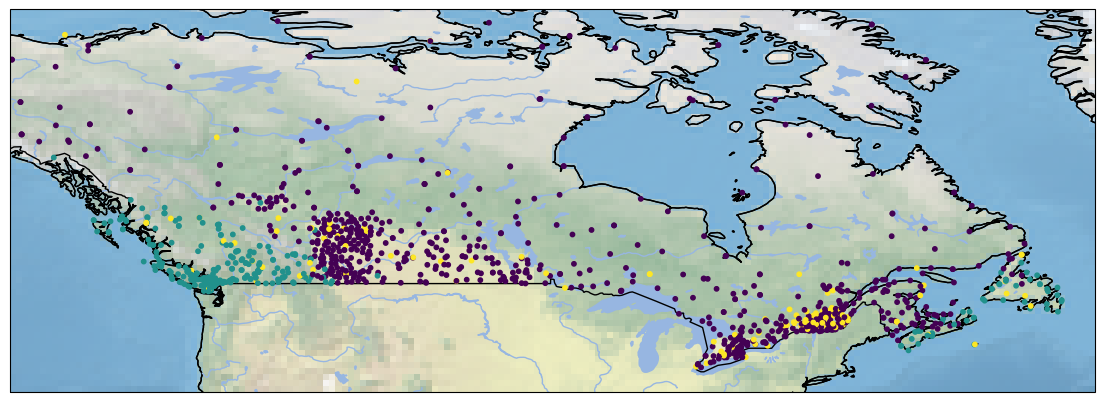

In [18]:
extent = [-140, -50, 40, 65]

plt.figure(figsize=(14, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.coastlines()
ax.stock_img()
ax.set_extent(extent)
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE)
ax.add_feature(cartopy.feature.LAKES)
ax.add_feature(cartopy.feature.RIVERS)
ax.add_feature(cartopy.feature.BORDERS)
ax.scatter(coords['Long'], coords['Lat'], transform=ccrs.PlateCarree(), c=y_pred, s=10)
plt.show()

За 3 кластери, ако ги игнорираме станиците на северот на Канада, можеме да видиме дека кластерирањето според временските карактеристики всушност генерира кластери кои се распоредени според близината на станицата до океаните.  

Ова има одредена смисла, но можеби обидот за кластерирање со внимателно нагоден DBSCAN може да даде подобри резултати.  

Обидете се и со различен број на кластери.  

## 9.3. Примена на кластерирањето  

Кластерирањето со KMeans е прилично лесно да се примени дури и на големи множества на податоци, така што има многу апликации. Успешно се користи меѓу другото и во групирање корисници при анализа и сегментација на пазарот, класификација на астрономски објекти, и обработка на слики во компјутерска визија. Исто така, често се користи како чекор за претпроцесирање за други алгоритми.  

Овде ќе ја демонстрираме употребата на KMeans за квантизација на бои. Ова е процес на намалување на палетата на бои на една слика на фиксен број на различни бои _k_. Ова го правиме земајќи го секој пиксел од сликата како податочна точка, а нејзините RGB вредности како обележја. Потоа ги делиме пикселите во _k_ кластери користејќи KMeans, и на секој пиксел му доделуваме нова боја - бојата на центроидот на неговиот кластер.  

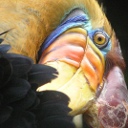

RGB вредности на пикселите во оригиналот:
 [[[219 180 103]
  [230 185 116]
  [226 186 110]
  ...
  [ 14  15  13]
  [ 13  15  12]
  [ 12  14  12]]

 [[230 193 119]
  [224 192 120]
  [226 192 124]
  ...
  [ 16  16  13]
  [ 14  15  10]
  [ 11  14   9]]

 [[228 191 123]
  [228 191 121]
  [220 185 118]
  ...
  [ 14  16  13]
  [ 13  13  11]
  [ 11  15  10]]

 ...

 [[ 15  18  16]
  [ 18  21  18]
  [ 18  19  16]
  ...
  [ 81  45  45]
  [ 70  43  35]
  [ 72  51  43]]

 [[ 16  17  17]
  [ 17  18  19]
  [ 20  19  20]
  ...
  [ 80  38  40]
  [ 68  39  40]
  [ 59  43  42]]

 [[ 15  19  19]
  [ 20  20  18]
  [ 18  19  17]
  ...
  [ 65  43  39]
  [ 58  37  38]
  [ 52  39  34]]]
Број на пиксели на сликата (редици): 16384
Број на различни бои на сликата (колони): 3
Податоци:
 [[0.85882353 0.70588235 0.40392157]
 [0.90196078 0.7254902  0.45490196]
 [0.88627451 0.72941176 0.43137255]
 ...
 [0.25490196 0.16862745 0.15294118]
 [0.22745098 0.14509804 0.14901961]
 [0.20392157 0.15294118 0.13333333]]


In [11]:
# Import libraries:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from scipy.io import loadmat
from IPython.display import Image, display

display(Image(filename='bird_small.png')) # show picture
image_data = loadmat('bird_small.mat') # load RGB values of the pixels of the picture
A = image_data['A']
print ("RGB вредности на пикселите во оригиналот:\n",A)

A = A / 255. # normalize value ranges
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2])) # reshape the array

print ("Број на пиксели на сликата (редици):",np.size(X,axis=0))
print ("Број на различни бои на сликата (колони):",np.size(X,axis=1))
print ("Податоци:\n",X)

Во низата X ги имаме податоците кои ги претставуваат сите вредности на пиксели со број помеѓу 0 и 1. Забележете дека има 16384 пиксели (резолуција 128x128) и секој пиксел има 3 бои (црвена, зелена и сина нијанса - RGB).  

Следно, користиме KMeans за да ги одвоиме пикселите во 16 кластери според сличноста на нивните бои. После тоа, бојата на секој пиксел се заменува со бојата на центроидот на неговиот кластер.  

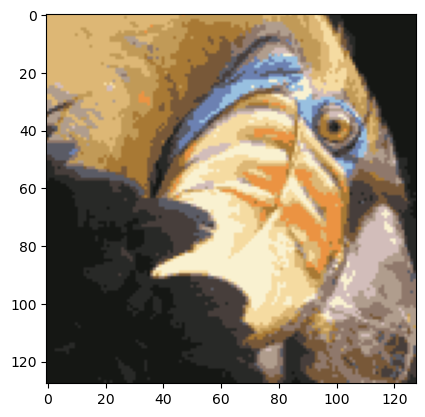

In [7]:
n_clusters = 16 # define number of clusters

# Run the algorithm:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', n_init=5) 
y_pred = kmeans.fit_predict(X)

# Recolor each pixel with its cluster centroid color and regenerate and show the new image: 
X_recovered = kmeans.cluster_centers_[y_pred] 
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))
plt.imshow(X_recovered);

Сликата сега има толку бои колку што има кластери. Сликата сè уште е препознатлива, но содржи многу помалку бои од оригиналот, а нејзината големина и барањата за меморија се намалени (т.е. таа е компресирана).  

Обидете се одново да ја кластерирате и регенерирате сликата за различен број кластери.  